In [1]:
import os
import sys
import random

import numpy as np

sys.path.append('..')

import src.preprocessing as preprocessing
import matplotlib.pyplot as plt
import rasterio

%load_ext autoreload
%autoreload 2

SEED = 42

random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

### Define data folders and years to consider

In [2]:
# Desired 10 years range from historical data
years_past = np.arange(2000, 2010) # last year excluded

# Desired 10 years range from future data
years_future1 = np.arange(2022, 2032) 
years_future2 = np.arange(2040, 2050) 

In [3]:
# Define climate data source folder
path_climate = os.path.join("..", "data", "climate_data", "")

# Define elevation data source folder
path_elevation = os.path.join("..", "data", "geo_data", "")

# Create folder to write all new files to 
path_past = os.path.join("..", "data", "processed_files", "tifs", '2000_2010',"")
path_future1 = os.path.join("..", "data", "processed_files", "tifs", '2022_2032',"")
path_future2= os.path.join("..", "data", "processed_files", "tifs", '2040_2050',"")

# Path to source tif
path_to_source = os.path.join("..", "data", "target", "cropmask.tif")

### Climate past data. Calculate average per each month within desired years range

In [4]:
if not os.path.exists(path_past):
    os.makedirs(path_past)

preprocessing.process_past_climate(path_climate, path_past, years_past)
preprocessing.process_past_spi(path_climate, path_past, years_past)

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:12<00:00,  1.21s/it]


Past climate data is collected


100%|██████████| 1/1 [00:00<00:00,  8.01it/s]

Past climate SPI data is collected


### Climate future data. Calculate average per each month within desired years range

In [5]:
if not os.path.exists(path_future1):
    os.makedirs(path_future1)
    
# future data 1
preprocessing.process_future_climate(path_climate, path_future1, years_future1, ssps=['ssp126', 'ssp245', 'ssp585'])
preprocessing.process_future_spi(path_climate, path_future1, years_future1, ssps=['ssp126', 'ssp245', 'ssp585'])


  0%|          | 0/30 [00:00<?, ?it/s]

/home/crop_dev/miniconda/envs/crop/lib/python3.10/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
100%|██████████| 30/30 [00:34<00:00,  1.14s/it]


Future climate data is collected


100%|██████████| 3/3 [00:00<00:00, 15.42it/s]

Future climate SPI data is collected


In [6]:
if not os.path.exists(path_future2):
    os.makedirs(path_future2)

# future data 2
preprocessing.process_future_climate(path_climate, path_future2, years_future2, ssps=['ssp126', 'ssp245', 'ssp585'])
preprocessing.process_future_spi(path_climate, path_future2, years_future2, ssps=['ssp126', 'ssp245', 'ssp585'])


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:33<00:00,  1.12s/it]


Future climate data is collected


100%|██████████| 3/3 [00:00<00:00, 13.27it/s]

Future climate SPI data is collected


### Define new bounds in coords 

In [7]:
# Define coordinate bounds
left = 20
top = 64
right = 152
bottom = 42

# Create object holding all crop features
bound = preprocessing.crop_features(left, top, right, bottom, path_to_source)

### Elevation data. Crop and reshape

In [8]:
path_elevation_new = os.path.join("..", "data", "processed_files", "tifs", 'elevation', '')

preprocessing.crop_tiff(path_elevation, path_elevation_new, bound)
preprocessing.reshape_tiff(path_elevation_new, path_elevation_new, bound)

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [00:56<00:00, 11.23s/it]


5 images croped


100%|██████████| 5/5 [00:33<00:00,  6.65s/it]

5 images reshaped with cubic interpolation


### Climate data. Crop and reshape

In [9]:
# historic data
preprocessing.crop_tiff(path_past, path_past, bound)
preprocessing.reshape_tiff(path_past, path_past, bound)

100%|██████████| 11/11 [00:00<00:00, 27.56it/s]


11 images croped


100%|██████████| 11/11 [02:57<00:00, 16.16s/it]

11 images reshaped with cubic interpolation


In [10]:
# future data 1
preprocessing.crop_tiff(path_future1, path_future1, bound)
preprocessing.reshape_tiff(path_future1, path_future1, bound)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:02<00:00, 33.90it/s]


99 images croped


100%|██████████| 99/99 [25:14<00:00, 15.30s/it]

99 images reshaped with cubic interpolation


In [11]:
# future data 2
preprocessing.crop_tiff(path_future2, path_future2, bound)
preprocessing.reshape_tiff(path_future2, path_future2, bound)

  0%|          | 0/99 [00:00<?, ?it/s]

100%|██████████| 99/99 [00:07<00:00, 13.89it/s]


99 images croped


100%|██████████| 99/99 [25:44<00:00, 15.60s/it]

99 images reshaped with cubic interpolation


### Renaming

In [12]:
# Rename historic files
preprocessing.rename_climate(path_past, ssps=['None'])

In [13]:
# Rename future 1 files
preprocessing.rename_climate(path_future1, ssps=['ssp126', 'ssp245', 'ssp585'])

In [14]:
# Rename future 2 files
preprocessing.rename_climate(path_future2, ssps=['ssp126', 'ssp245', 'ssp585'])

In [15]:
# Rename elevation files
preprocessing.rename_elevation(path_elevation_new)

BoundingBox(left=18.0, bottom=40.0, right=191.0, top=85.0)
BoundingBox(left=19.99649822450055, bottom=41.99623953258762, right=152.00392922586425, top=64.0049639935159)
14695 2450


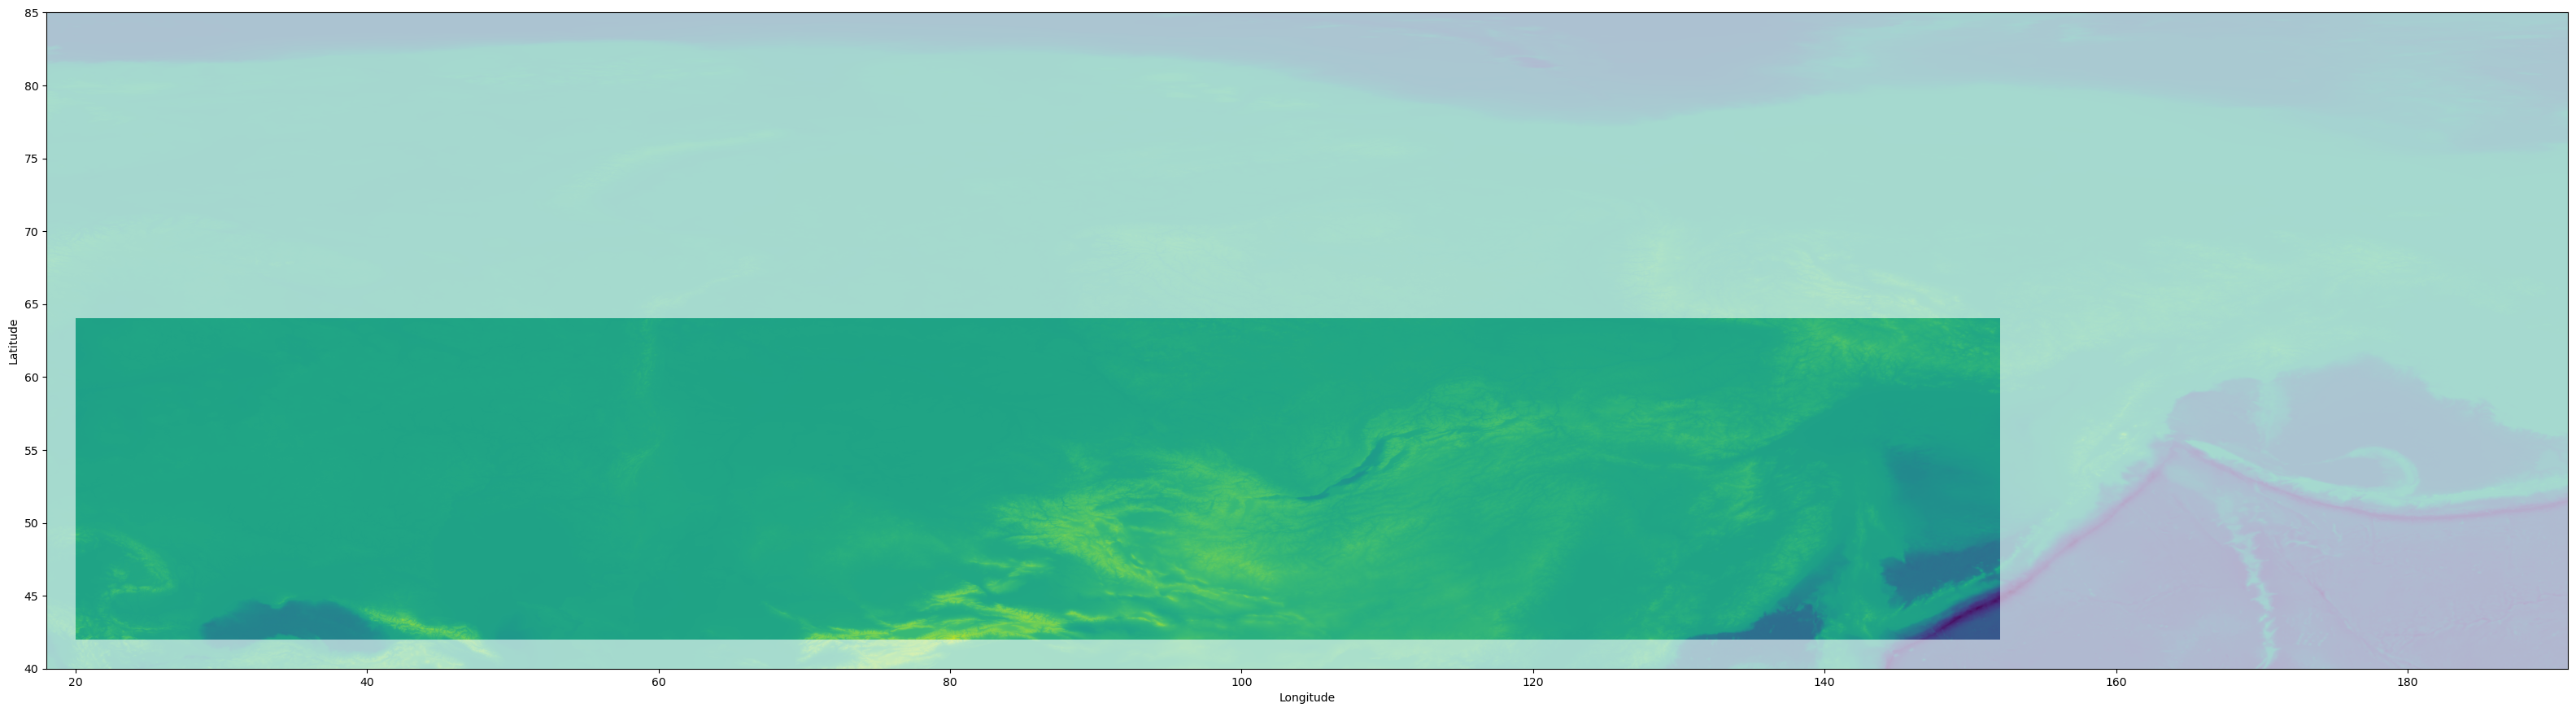

In [16]:
# Just to compare visually
path_to_initial_file = os.path.join("..", "data", "geo_data", "DEM_1km.tif")

raster = rasterio.open(path_to_initial_file)
print(raster.bounds)
elv = rasterio.open(os.path.join("..", "data", "processed_files", 'tifs', 'elevation', "altitude.tif"))
print(elv.bounds)
print(elv.width, elv.height)

fig, ax = plt.subplots(figsize=(40, 15))

rasterio.plot.show(elv, ax=ax)
rasterio.plot.show(raster, ax=ax, alpha=0.4)
plt.xlabel("Longitude")
plt.ylabel("Latitude")

raster.close()
elv.close()